<a href="https://colab.research.google.com/github/20192931/python/blob/main/pandas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.DataFrame({'name' : ['김지훈','이유진','박동현','김민지'],
                  'english' : [90,80,60,70],
                  'math' : [50,60,100,20]})
df['english']

In [ ]:
df_exam = pd.read_excel('excel_exam.xlsx')
df_exam

In [ ]:
df_csv_exam = pd.read_csv('exam.csv')
df_csv_exam

In [ ]:
df.to_csv('output_newdata.csv')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager,rc
rc('font',family='NanumBarunGothic')
rc('axes',unicode_minus=False)

In [ ]:
df = pd.read_excel('I-01_청소년스트레스인지율.xlsx')
df.head(10)

In [ ]:
df.info()

In [ ]:
df['남']=df['남'].replace('-',np.nan)
df['남']=df['남'].astype('float')
df['여']=df['여'].replace('-',np.nan)
df['여']=df['여'].astype('float')
df.rename(columns={'남':'남학생'},inplace=True)
df.rename(columns={'여':'여학생'},inplace=True)
df.head(10)

In [ ]:
df_region=df.groupby('지역').mean()
df_region=df_region.round(2)
df_region

In [ ]:
df_data=df_region.drop(columns=['연도'])
df_data.head()

In [ ]:
df_seoul=df[df['지역'].str.contains('서울')]
df_seoul

In [ ]:
df_seoul.set_index('연도',drop=True,inplace=True)
df_seoul

In [ ]:
df_seoul.plot.bar()
plt.grid(True)

In [ ]:
df_seoul.plot.box()

In [ ]:
df_seoul.plot(marker='o')

In [ ]:
df_a=df[df['지역'].str.contains('경기')]
df_a.set_index('연도',drop=True,inplace=True)
df_a.plot.bar()

In [ ]:
df.describe()

In [ ]:
df[df['여학생']==58.2]

In [ ]:
df_ranking=pd.read_csv('I-01_청소년고민순위정보.csv')
df_ranking

,SN,CRTR_YM,SEARCH_RANK_NM,SRCHW_NM,RDCNT,PT_VALUE
0,1,201901,1,친구,69,24.21
1,2,201901,2,전학,20,7.02
2,3,201901,3,공부,15,5.26
3,4,201901,4,숨쉬기,13,4.56
4,5,201901,5,학원,11,3.86
...,...,...,...,...,...,...
960,961,202011,42,질투,5,0.89
961,962,202011,43,시험,5,0.89
962,963,202011,44,인생,5,0.89
963,964,202011,45,사춘기,4,0.71


In [ ]:
df_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SN              965 non-null    int64  
 1   CRTR_YM         965 non-null    int64  
 2   SEARCH_RANK_NM  965 non-null    int64  
 3   SRCHW_NM        965 non-null    object 
 4   RDCNT           965 non-null    int64  
 5   PT_VALUE        965 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 45.4+ KB


In [ ]:
df_ranking.columns = ['순번','기준년월','검색순위','검색어명','조회수','퍼센트값']
df_ranking.head()

,순번,기준년월,검색순위,검색어명,조회수,퍼센트값
0,1,201901,1,친구,69,24.21
1,2,201901,2,전학,20,7.02
2,3,201901,3,공부,15,5.26
3,4,201901,4,숨쉬기,13,4.56
4,5,201901,5,학원,11,3.86


In [ ]:
df_ranking=df_ranking.groupby('검색어명')['조회수'].sum().sort_values(ascending=False)[:20]

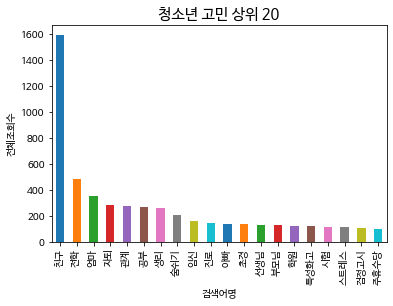

In [ ]:
plt.title('청소년 고민 상위 20',fontsize=15)
plt.ylabel('전체조회수')
colors =['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
df_ranking.plot.bar(color=colors)